In [74]:
import numpy as np
from ex1_utils import *
from scipy import signal

def lucaskanade(im1, im2, N):

    im1 = gausssmooth(im1, 1)/255
    im2 = gausssmooth(im2, 1)/255


    # First calculate the temporal, x, and y derivatives
    Dt = gausssmooth(im2 - im1, 1)    
    Dx, Dy = gaussderiv((im1+im2)/2, 1)

    kernel = np.ones((N, N))


    Dx2 = signal.convolve2d(np.multiply(Dx, Dx), kernel, mode='same')
    Dy2 = signal.convolve2d(np.multiply(Dy, Dy), kernel, mode='same')
    Dxt = signal.convolve2d(np.multiply(Dx, Dt), kernel, mode='same')
    Dyt = signal.convolve2d(np.multiply(Dy, Dt), kernel, mode='same')
    Dxy = signal.convolve2d(np.multiply(Dx, Dy), kernel, mode='same')


    denominator = Dx2*Dy2 - Dxy*Dxy
    denominator += 1e-5
    
    u = -(Dy2*Dxt - Dxy*Dyt)/denominator
    v = -(Dx2*Dyt - Dxy*Dxt)/denominator
    return u, v

In [88]:
import numpy as np
from ex1_utils import *
from scipy import signal
from lucas_kanade import lucaskanade

def hornschunck(im1, im2, n_iters, lmbd, use_lk=False):
    u = np.zeros(im1.shape)
    v = np.zeros(im1.shape)

    if(use_lk):
        u, v = lucaskanade(im1, im2, 3)

    im1 = gausssmooth(im1, 1)/255
    im2 = gausssmooth(im2, 1)/255

    Dt = gausssmooth(im2 - im1, 1)    
    Dx, Dy = gaussderiv((im1+im2)/2, 1)

    ld = np.array([[0, 0.25, 0], 
                   [0.25, 0, 0.25], 
                   [0, 0.25, 0]])
    
    D = lmbd + Dx*Dx + Dy*Dy
    for i in range(n_iters):
        u_similarity =
        ua = signal.convolve2d(u, ld, mode='same')
        va = signal.convolve2d(v, ld, mode='same')

        P = Dx*ua + Dy*va + Dt
        fract = P/D
        u = ua - Dx*fract
        v = va - Dy*fract

    return u, v

529.9999
536.9992


Text(0.5, 0.98, 'Horn-Schunck Optical Flow')

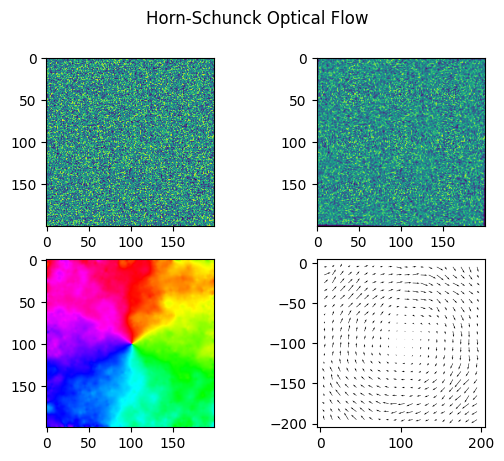

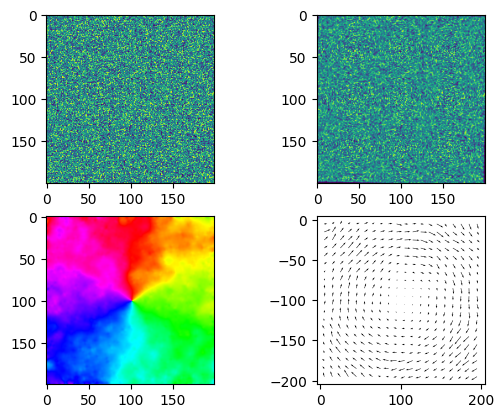

In [90]:
import numpy as np
import time
import matplotlib.pyplot as plt
from ex1_utils import rotate_image , show_flow
im1 = np.random.rand(200, 200).astype(np.float32)
im2 = im1.copy()
im2 = rotate_image(im2, -1)

before_hs = time.time_ns()
U_lk, V_lk = hornschunck(im1, im2, 200, 0.3)
after_hs = time.time_ns()
U_lk2, V_lk2 = hornschunck(im1, im2, 200, 0.3, use_lk=True)
after_hs2 = time.time_ns()
first = (after_hs - before_hs) / 1000000
second = (after_hs2 - after_hs) / 1000000
print(first)
print(second)
#U_lk2, V_lk2 = hornschunck(im1, im2, 600, 0.3)

fig1, ((ax1_11, ax1_12), (ax1_21, ax1_22)) = plt.subplots(2,2)
ax1_11.imshow(im1)
ax1_12.imshow(im2)
show_flow(U_lk, V_lk, ax1_21, type='angle')
show_flow(U_lk, V_lk, ax1_22, type='field', set_aspect=True)
fig1.suptitle('Lucas-Kanade Optical Flow')

fig2, ((ax2_11, ax2_12), (ax2_21, ax2_22)) = plt.subplots(2,2)
ax2_11.imshow(im1)
ax2_12.imshow(im2)
show_flow(U_lk2, V_lk2, ax2_21, type='angle')
show_flow(U_lk2, V_lk2, ax2_22, type='field', set_aspect=True)
fig1.suptitle('Horn-Schunck Optical Flow')

